In [124]:
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [125]:
def gen_paths(S0, r, sigma, T, M, I):
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1 ):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths


In [126]:
S0 = 1000
r = 0.05
sigma = 0.02
T = 1.0
M =50
I = 25000

In [127]:
paths = gen_paths(S0, r, sigma, T, M, I)

Text(0, 0.5, 'index level')

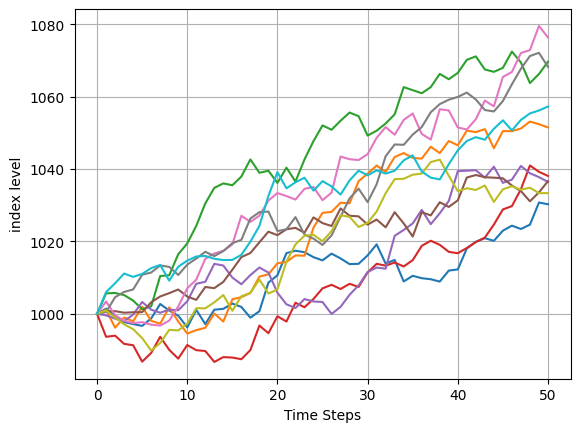

In [128]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('Time Steps')
plt.ylabel('index level')

In [129]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [130]:
log_returns

array([[ 1.41758938e-03,  1.07660582e-03,  5.64012902e-03, ...,
         1.00722102e-03,  7.84407306e-03,  2.66466592e-03],
       [-2.10549738e-03, -4.91046428e-03,  9.59407626e-05, ...,
        -3.37702424e-03,  5.58652306e-04, -4.03443472e-03],
       [-1.60002966e-03,  2.82144485e-03, -5.75958182e-04, ...,
         4.01040938e-03,  1.03781022e-03,  4.52750069e-03],
       ...,
       [ 1.17389748e-03,  1.81026680e-03, -5.34018641e-03, ...,
         6.12167297e-04,  6.54356350e-03, -1.89386670e-03],
       [ 5.94761427e-03, -6.85218162e-04,  2.34537714e-03, ...,
        -1.15247052e-04,  9.40779680e-04, -5.63223347e-03],
       [-4.56872114e-04, -8.43426572e-04,  3.19622499e-03, ...,
         2.40035427e-03,  3.29952825e-03,  1.78353746e-03]])

In [131]:
paths[:, 0].round(4)

array([1000.    , 1001.4186,  999.3123,  997.7147,  997.1686,  996.6594,
        998.7333, 1002.7129, 1000.8984,  999.4904,  996.2571, 1001.0883,
        997.1648, 1001.1358, 1001.3778, 1002.8388, 1001.8965,  998.933 ,
       1000.7148, 1008.6299, 1010.656 , 1016.7688, 1017.4291, 1017.0147,
       1015.6462, 1014.772 , 1016.6195, 1015.3042, 1013.7315, 1013.8106,
       1016.1525, 1019.1854, 1013.8709, 1014.8892, 1008.9371, 1010.5011,
       1009.8408, 1009.5529, 1008.9134, 1011.9423, 1012.2606, 1018.0591,
       1019.8987, 1020.8942, 1020.165 , 1022.9703, 1024.3581, 1023.4286,
       1024.6307, 1030.7429, 1030.2721])

In [132]:
log_returns[:, 0].round(4)

array([ 0.0014, -0.0021, -0.0016, -0.0005, -0.0005,  0.0021,  0.004 ,
       -0.0018, -0.0014, -0.0032,  0.0048, -0.0039,  0.004 ,  0.0002,
        0.0015, -0.0009, -0.003 ,  0.0018,  0.0079,  0.002 ,  0.006 ,
        0.0006, -0.0004, -0.0013, -0.0009,  0.0018, -0.0013, -0.0016,
        0.0001,  0.0023,  0.003 , -0.0052,  0.001 , -0.0059,  0.0015,
       -0.0007, -0.0003, -0.0006,  0.003 ,  0.0003,  0.0057,  0.0018,
        0.001 , -0.0007,  0.0027,  0.0014, -0.0009,  0.0012,  0.0059,
       -0.0005])

# **Normality Test**

In [133]:
def print_statistics(array):

    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value' ))
    print( 30 * "-")
    print("%14s %15s" % ('size', sta[0]))
    print("%14s %15s" % ('min', sta[1][0]))
    print("14%s %15s" %  ('max', sta[1][1]))
    print("14%s %15s" % ('mean', sta[2]))
    print("14%s %15s" % ('std', np.sqrt(sta[3])))
    print("14%s %15s" % ('skew', sta[4]))
    print("14%s %15s" % ('kurtosis', sta[5]))


In [134]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size         1250000
           min -0.012810067739448474
14max 0.014574479172631695
14mean 0.0009960000000000004
14std 0.002828428256117718
14skew -0.0003122028785696756
14kurtosis 0.000608064854143997


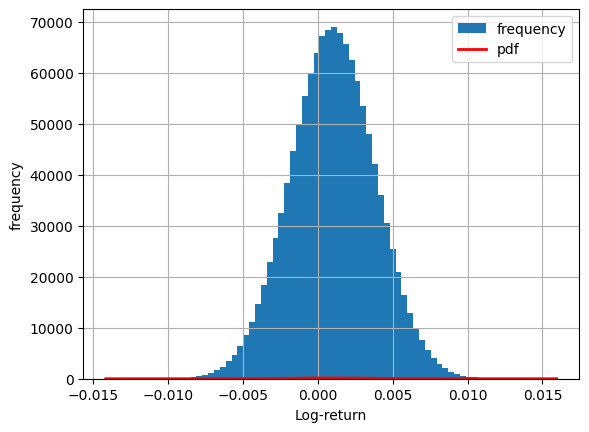

In [135]:
plt.hist(log_returns.flatten(), bins=70,  label='frequency')
plt.grid(True )
plt.xlabel('Log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma/np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantiles')

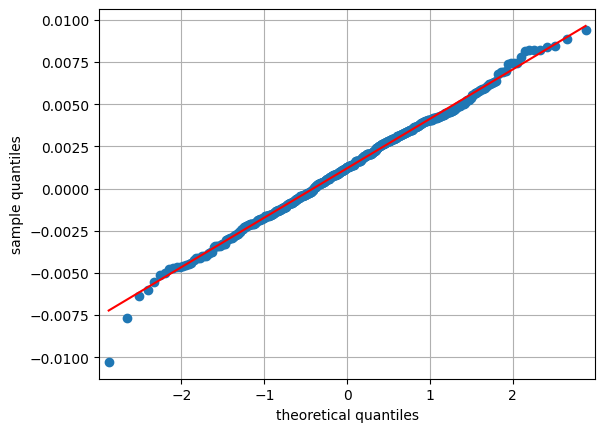

In [136]:
sm.qqplot(log_returns.flatten()[:500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [137]:
def normality_tests(arr):

    print("Skew of data set %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr) [1])
    print("Kurt of data set %14.3f" % scs.kurtosis(arr))
    print("kurt test p-value %14.3f" % scs.kurtosistest (arr) [1])
    print("Norm test p-value %14.3f" % scs.normaltest (arr) [1])

In [138]:
normality_tests(log_returns.flatten())

Skew of data set         -0.000
Skew test p-value          0.887
Kurt of data set          0.001
kurt test p-value          0.887
Norm test p-value          0.980


Text(0.5, 1.0, 'log Data')

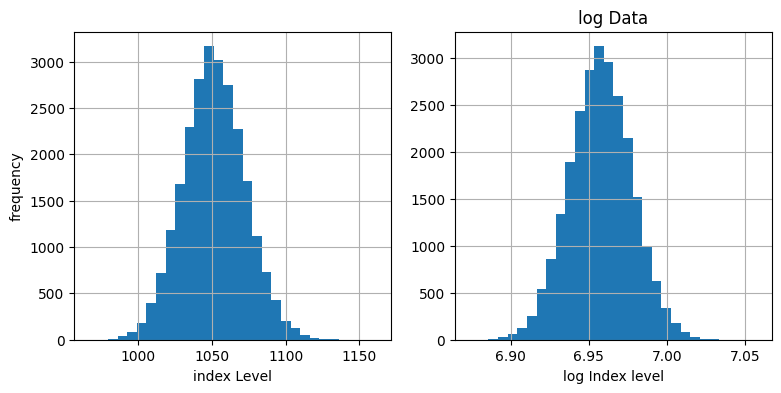

In [139]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index Level')
ax1.set_ylabel('frequency')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log Index level')
ax2.set_title('log Data')

In [140]:
 print_statistics(paths[-1])

     statistic           value
------------------------------
          size           25000
           min 966.2971710056821
14max 1161.9668654945003
14mean 1051.2686677754286
14std 20.9077827495016
14skew 0.07211937863454897
14kurtosis 0.018886978444510927


In [141]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size           25000
           min 6.873471417344641
14max 7.05786942194032
14mean 6.957555278982137
14std 0.019883746867962678
14skew 0.012222661256383747
14kurtosis 0.0057892872921736505


In [142]:
normality_tests(np.log(paths[-1]))

Skew of data set          0.012
Skew test p-value          0.430
Kurt of data set          0.006
kurt test p-value          0.834
Norm test p-value          0.717


In [143]:
import yfinance as yf
import pandas as pd

In [144]:
symbols = ['TSLA', 'MSFT', 'GS', 'AAPL']
start = '2024-01-01'
end='2024-02-29'

In [145]:
data = pd.DataFrame()
for sym in symbols:
    data[sym] = yf.download(sym, start, end)['Adj Close']
data.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TSLA,MSFT,GS,AAPL
Date,,,,
2024-01-02,248.419998,370.185425,388.299988,185.403412
2024-01-03,238.449997,369.915924,381.790009,184.015198
2024-01-04,237.929993,367.260834,382.950012,181.678177
2024-01-05,237.490005,367.071198,386.440002,180.949097
2024-01-08,240.449997,373.998383,388.859985,185.323517
2024-01-09,234.960007,375.096375,383.739990,184.904053
2024-01-10,233.940002,382.063446,381.959991,185.952713
2024-01-11,227.220001,383.920044,379.750000,185.353485
2024-01-12,218.889999,387.752960,377.750000,185.683060


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34 entries, 2024-01-02 to 2024-02-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    34 non-null     float64
 1   MSFT    34 non-null     float64
 2   GS      34 non-null     float64
 3   AAPL    34 non-null     float64
dtypes: float64(4)
memory usage: 1.3 KB


In [147]:
data.head()

,TSLA,MSFT,GS,AAPL
Date,,,,
2024-01-02,248.419998,370.185425,388.299988,185.403412
2024-01-03,238.449997,369.915924,381.790009,184.015198
2024-01-04,237.929993,367.260834,382.950012,181.678177
2024-01-05,237.490005,367.071198,386.440002,180.949097
2024-01-08,240.449997,373.998383,388.859985,185.323517


<Axes: xlabel='Date'>

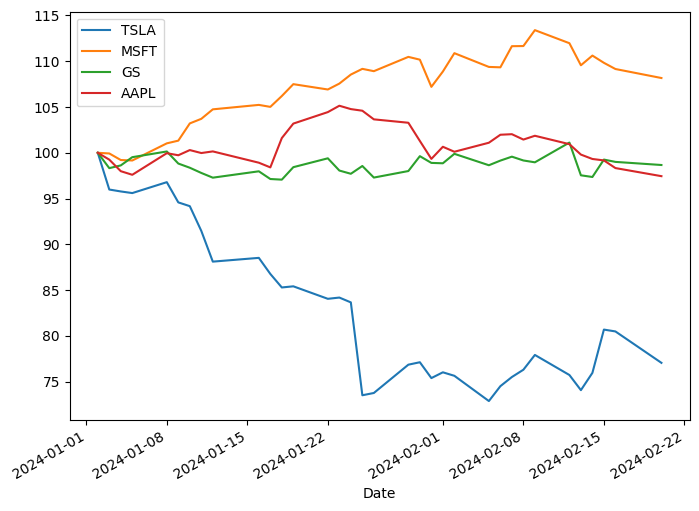

In [148]:
(data / data.iloc[0] * 100).plot(figsize=(8, 6))

In [149]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,TSLA,MSFT,GS,AAPL
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.040961,-0.000728,-0.016907,-0.007516
2024-01-04,-0.002183,-0.007203,0.003034,-0.012781
2024-01-05,-0.001851,-0.000516,0.009072,-0.004021
2024-01-08,0.012387,0.018696,0.006243,0.023887


array([[<Axes: title={'center': 'TSLA'}>,
        <Axes: title={'center': 'MSFT'}>],
       [<Axes: title={'center': 'GS'}>, <Axes: title={'center': 'AAPL'}>]],
      dtype=object)

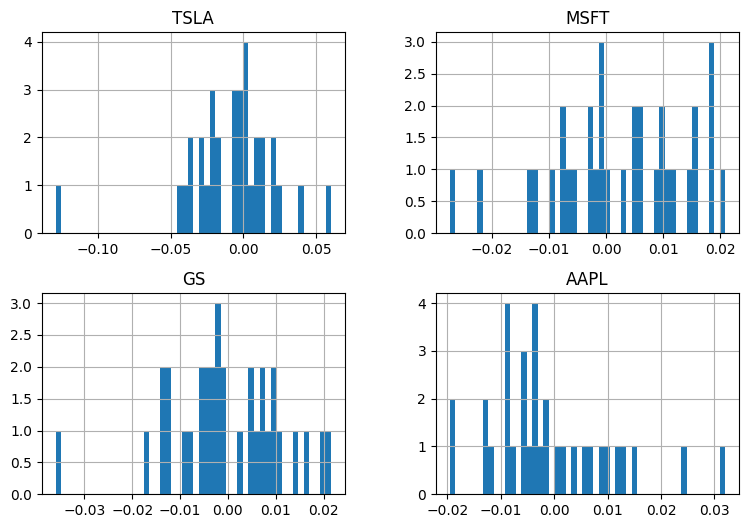

In [150]:
log_returns.hist(bins=50, figsize=(9, 6))

In [151]:
for sym in symbols:
    print("\nResults for symbols %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbols TSLA
------------------------------
     statistic           value
------------------------------
          size              33
           min -0.12925817170128795
14max 0.06035334314528131
14mean -0.007897149698432613
14std 0.03196554874262857
14skew -1.3531817190291477
14kurtosis 4.795256659014457

Results for symbols MSFT
------------------------------
     statistic           value
------------------------------
          size              33
           min -0.027316055622671805
14max 0.0208905032924385
14mean 0.00237876531306709
14std 0.01180394415357103
14skew -0.4773640254964274
14kurtosis -0.18035892160253253

Results for symbols GS
------------------------------
     statistic           value
------------------------------
          size              33
           min -0.036016842006519785
14max 0.02157376661243598
14mean -0.0004069685457884239
14std 0.011717199868792062
14skew -0.5464773927929392
14kurtosis 1.0217506739427424

Results for symbols AAPL
--

Text(0, 0.5, 'sample Quantiles')

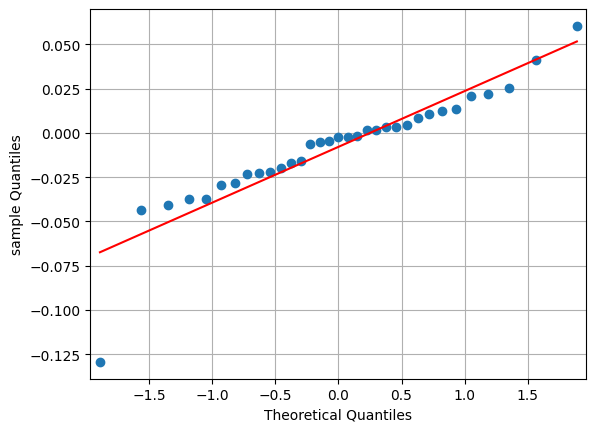

In [152]:
sm.qqplot(log_returns['TSLA'].dropna(), line='s')
plt.grid(True)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('sample Quantiles')

Text(0, 0.5, 'sample Quantiles')

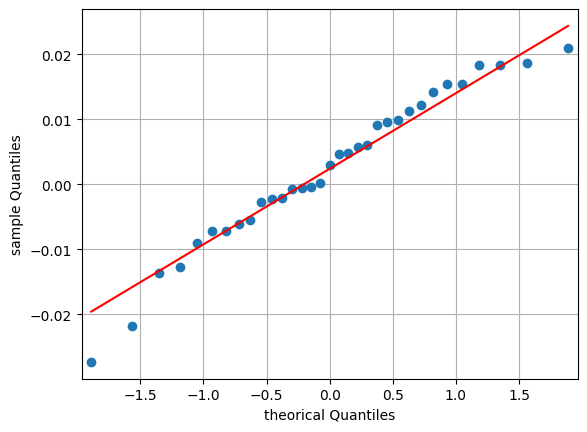

In [153]:
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theorical Quantiles')
plt.ylabel('sample Quantiles')

Text(0, 0.5, 'sample Quantiles')

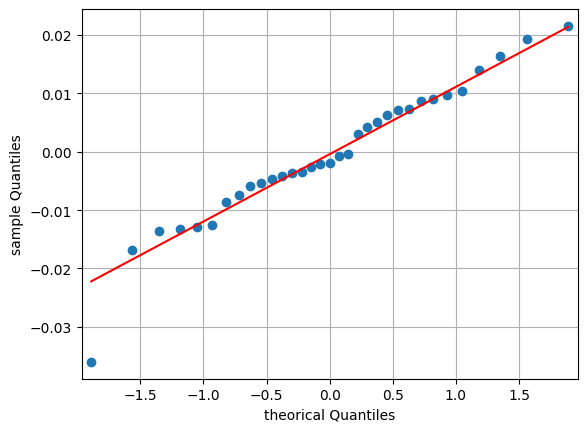

In [154]:
sm.qqplot(log_returns['GS'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theorical Quantiles')
plt.ylabel('sample Quantiles')

Text(0, 0.5, 'Sample Quantiles')

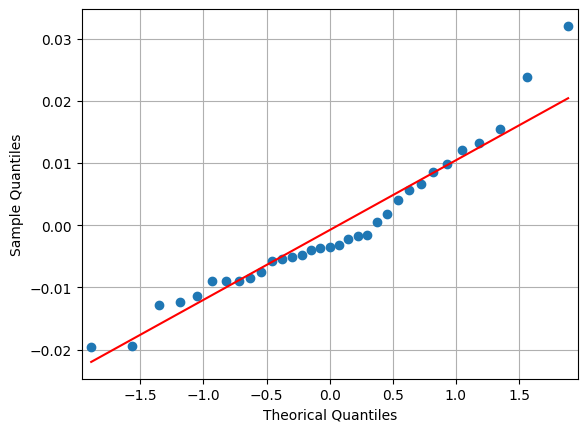

In [155]:
sm.qqplot(log_returns['AAPL'].dropna(), line='s')
plt.grid(True)
plt.xlabel('Theorical Quantiles')
plt.ylabel('Sample Quantiles')

In [156]:
for sym in symbols :
    print("\nResults for symbols %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbols TSLA
--------------------------------
Skew of data set         -1.353
Skew test p-value          0.002
Kurt of data set          4.795
kurt test p-value          0.001
Norm test p-value          0.000

Results for symbols MSFT
--------------------------------
Skew of data set         -0.477
Skew test p-value          0.208
Kurt of data set         -0.180
kurt test p-value          0.822
Norm test p-value          0.441

Results for symbols GS
--------------------------------
Skew of data set         -0.546
Skew test p-value          0.153
Kurt of data set          1.022
kurt test p-value          0.113
Norm test p-value          0.103

Results for symbols AAPL
--------------------------------
Skew of data set          0.898
Skew test p-value          0.026
Kurt of data set          0.841
kurt test p-value          0.152
Norm test p-value          0.030


# **Portfolio Optimization**

In [157]:
log_returns.mean() * 252

TSLA   -1.990082
MSFT    0.599449
GS     -0.102556
AAPL   -0.197491
dtype: float64

In [158]:
log_returns.std() * 252

TSLA    8.055318
MSFT    2.974594
GS      2.952734
AAPL    2.872161
dtype: float64

In [159]:
noa = len(symbols)

In [160]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [161]:
weights

array([0.47403743, 0.05723092, 0.23772066, 0.23101099])

In [162]:
np.sum(log_returns.mean() * weights) * 252

-0.9790684809331678

In [164]:
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))

0.07044947341046293

In [165]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

0.2654231968205924

In [166]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(log_returns.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))))


prets = np.array(prets)
pvols = np.array(pvols)



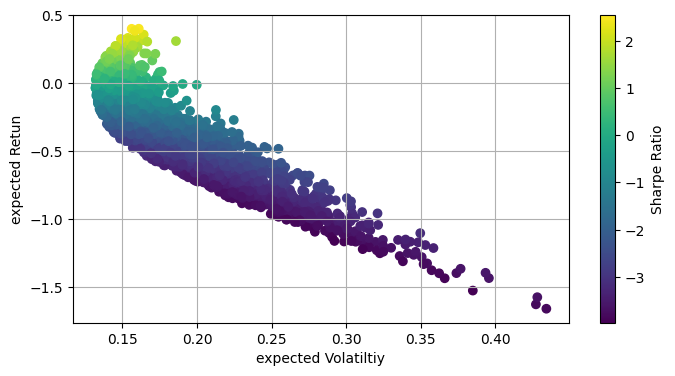

In [167]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected Volatiltiy')
plt.ylabel('expected Retun')
plt.colorbar(label='Sharpe Ratio')

In [168]:
data.corr()

,TSLA,MSFT,GS,AAPL
TSLA,1.000000,-0.918871,0.008633,-0.336940
MSFT,-0.918871,1.000000,0.056032,0.414788
GS,0.008633,0.056032,1.000000,-0.093269
AAPL,-0.336940,0.414788,-0.093269,1.000000


In [206]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(log_returns.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [207]:
import scipy.optimize as sco

In [208]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [209]:
cons = ({'type': 'eq', 'fun': lambda x : np.sum(x) - 1})

In [210]:
bnds = tuple((0, 1) for x in range(noa))

In [211]:
noa * [1. / noa, ]

[0.25, 0.25, 0.25, 0.25]

In [212]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                    bounds=bnds, constraints=cons)

CPU times: user 21.5 ms, sys: 101 µs, total: 21.6 ms
Wall time: 22.5 ms


In [213]:
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.1990772053211676
       x: [ 0.000e+00  1.000e+00  1.174e-14  8.604e-16]
     nit: 2
     jac: [ 1.264e+01 -2.980e-08  1.355e+00  2.633e+00]
    nfev: 10
    njev: 2

In [214]:
opts['x'].round(3)

array([0., 1., 0., 0.])

In [215]:
statistics(opts['x']).round(3)

array([0.599, 0.187, 3.199])